In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd


c:\Users\Dell 5520\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [51]:
df = pd.read_csv('data/primaryschool.csv', header=None, delimiter='\t', names = ['time', 'u', 'v', 'grade_u', 'grade_v'])
print(df.head())

metadata = pd.read_csv('data/metadata.txt', header=None, delimiter='\t', names = ['id', 'grade', 'gender'])
print(metadata.head())

    time     u     v grade_u grade_v
0  31220  1558  1567      3B      3B
1  31220  1560  1570      3B      3B
2  31220  1567  1574      3B      3B
3  31220  1632  1818      4B      4B
4  31220  1632  1866      4B      4B
     id grade gender
0  1426    5B      M
1  1427    5B      F
2  1428    5B      M
3  1429    5B      F
4  1430    5B      M


In [52]:
G = nx.Graph()

node_grade = {}
for _, row in metadata.iterrows():
    node_grade[row['id']] = row['grade']

for _, edge in df.iterrows():
    if node_grade[edge['u']] != "Teachers" and node_grade[edge['v']] != "Teachers":
        G.add_edge(edge['u'], edge['v'])



In [81]:
grade_dict = {"1A": "red", "1B": "red", "2A": "orange", "2B": "orange", "3A": "gray", "3B": "gray", "4A": "cyan", "4B": "cyan", "5A": "blue", "5B": "blue", "Teachers": "black"}
grade_dict_more = {"1A": "firebrick", "1B": "red", "2A": "orange", "2B": "sandybrown", "3A": "slategray", "3B": "gray", "4A": "darkturquoise", "4B": "cyan", "5A": "cornflowerblue", "5B": "blue", "Teachers": "black"}


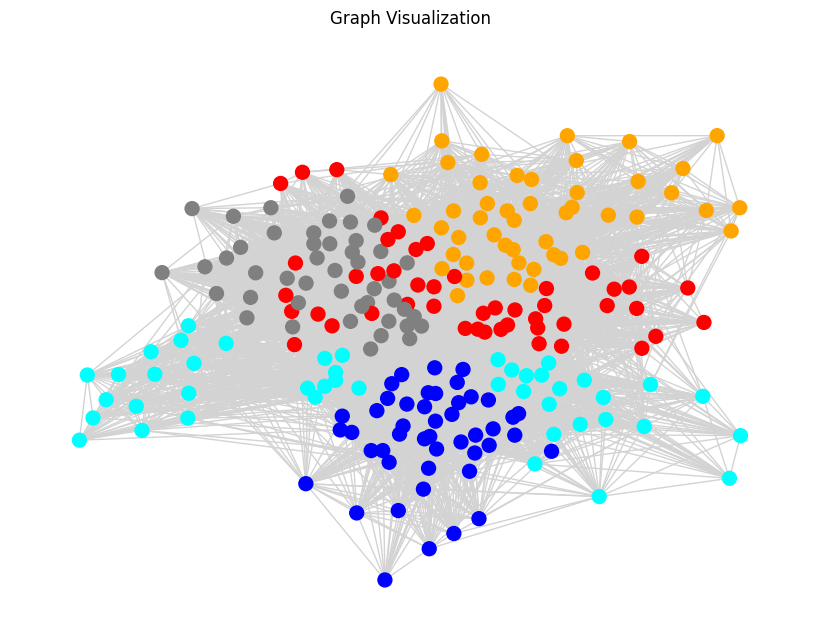

In [19]:
# Draw the graph
node_colors = [grade_dict[node_grade[node]] for node in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw(G, node_size=100, node_color = node_colors, edge_color='lightgray')
plt.title("Graph Visualization")
plt.show()

# Community detection

## Girvan Newman

Community 1: {1715}
Community 2: {1538, 1539, 1545, 1546, 1548, 1549, 1551, 1552, 1555, 1558, 1560, 1562, 1563, 1564, 1567, 1570, 1572, 1574, 1578, 1579, 1580, 1585, 1592, 1594, 1601, 1603, 1604, 1606, 1609, 1613, 1616, 1617, 1618, 1625, 1628, 1630, 1632, 1637, 1641, 1643, 1647, 1648, 1649, 1656, 1661, 1663, 1664, 1665, 1666, 1670, 1673, 1674, 1675, 1680, 1681, 1682, 1684, 1685, 1687, 1688, 1695, 1696, 1697, 1698, 1700, 1702, 1704, 1705, 1706, 1707, 1708, 1710, 1711, 1712, 1713, 1714, 1718, 1719, 1720, 1722, 1723, 1727, 1730, 1731, 1732, 1735, 1737, 1738, 1739, 1741, 1743, 1744, 1748, 1749, 1750, 1751, 1752, 1757, 1759, 1760, 1761, 1763, 1764, 1765, 1766, 1767, 1768, 1770, 1772, 1774, 1775, 1778, 1779, 1780, 1782, 1783, 1787, 1789, 1790, 1792, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1805, 1807, 1809, 1815, 1818, 1819, 1820, 1821, 1822, 1831, 1833, 1835, 1836, 1837, 1838, 1843, 1847, 1851, 1854, 1855, 1857, 1858, 1859, 1861, 1863, 1865, 1866, 1872, 1877, 1880, 1883, 1885, 

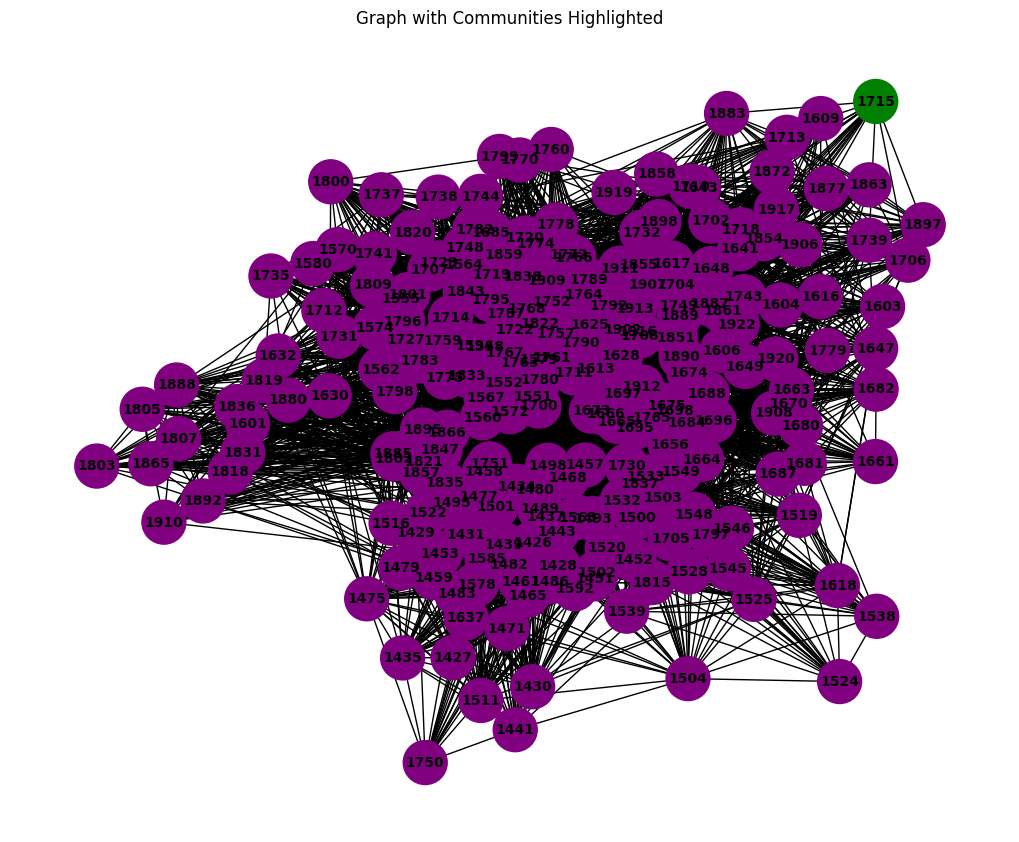

In [ ]:
# Run community detection to find two components
from networkx.algorithms import community

# Use a community detection algorithm (e.g., Girvan-Newman method)
communities = list(community.girvan_newman(G))


In [ ]:
import pickle

# Save the communities variable
with open('communities.pkl', 'wb') as file:
    pickle.dump(communities, file)

## Load the communities variable
# with open('communities.pkl', 'rb') as file:
#     loaded_communities = pickle.load(file)

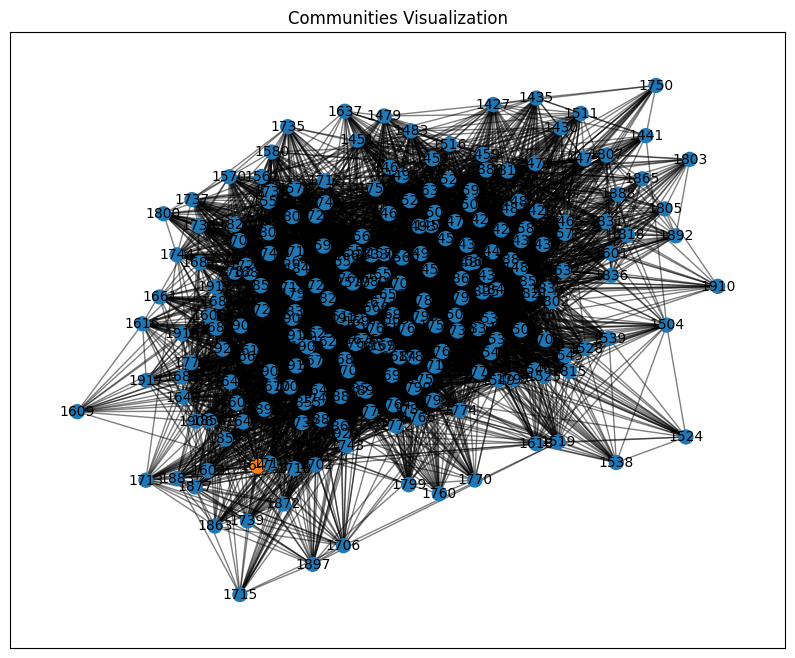

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle, islice

# Assign colors to each community
def assign_colors_to_communities(G, communities):
    pos = nx.spring_layout(G)  # Layout for visualization
    color_cycle = cycle(plt.cm.tab10.colors)  # Color palette
    node_colors = {}

    for i, community in enumerate(communities[0]):  # Consider the first level of communities
        color = next(color_cycle)
        for node in community:
            node_colors[node] = color

    return pos, node_colors

# Draw the graph
def draw_graph_with_communities(G, pos, node_colors):
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_color=list(node_colors.values()), cmap=plt.cm.tab10, node_size=100)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    plt.title("Communities Visualization")
    plt.show()

# Assign positions and colors
pos, node_colors = assign_colors_to_communities(G, communities)

# Visualize the graph
draw_graph_with_communities(G, pos, node_colors)


Number of communities at each level

In [ ]:
## SHow how many communities are in each level

# for i, level in enumerate(communities):
#     print(f"Level {i}: {len(level)} communities")

Visualize particular level

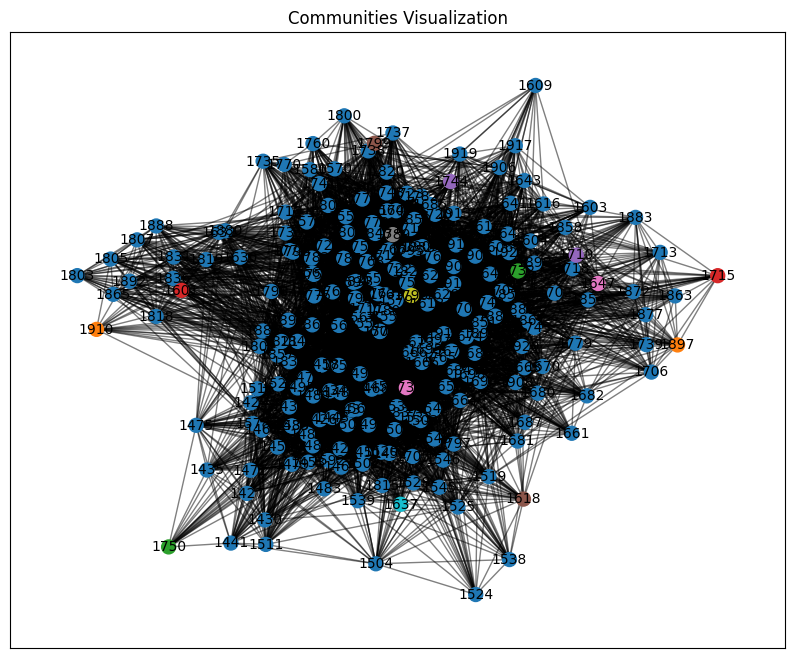

In [ ]:

level_to_visualize = 15  # Adjust this to select a specific level
selected_communities = communities[level_to_visualize]

# Update the visualization functions accordingly
def assign_colors_to_communities(G, selected_communities):
    pos = nx.spring_layout(G)  # Layout for visualization
    color_cycle = cycle(plt.cm.tab10.colors)  # Color palette
    node_colors = {}

    for i, community in enumerate(selected_communities):
        color = next(color_cycle)
        for node in community:
            node_colors[node] = color

    return pos, node_colors

# Assign positions and colors for the chosen level
pos, node_colors = assign_colors_to_communities(G, selected_communities)

# Visualize the graph
draw_graph_with_communities(G, pos, node_colors)


### Dynamic Visualisation of All Levels

In [ ]:
# for i, level in enumerate(communities):
#     selected_communities = level
#     print(f"Visualizing Level {i} with {len(level)} communities")
    
#     pos, node_colors = assign_colors_to_communities(G, selected_communities)
#     draw_graph_with_communities(G, pos, node_colors)

## Louvian Method

* Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
* Param: resolution:double, optional - Will change the size of the communities, default to 1. represents the time described in “Laplacian Dynamics and Multiscale Modular Structure in Networks”, R. Lambiotte, J.-C. Delvenne, M. Barahona

In [47]:
pip install --upgrade networkx

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install python-louvain

     ------------------------------------ 204.6/204.6 kB 777.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9399 sha256=1fdf1e8b9156370b1070f1a2af3bb69d19070ddf1812dc2357ab9f485512576f
  Stored in directory: c:\users\dell 5520\appdata\local\pip\cache\wheels\f6\23\43\a714ed84811240ec3e8e709b8594ecdfbc8ad36ca5d949e38e
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import networkx as nx
# from networkx.algorithms.community import louvain_communities

# # Detect communities
# communities = louvain_communities(G)

# # Visualize
# print(f"Number of communities detected: {len(communities)}")


In [ ]:
import community as community_louvain
# Detect communities
partition = community_louvain.best_partition(G)

# Print the communities
print(partition)

{1558: 0, 1567: 0, 1560: 0, 1570: 0, 1574: 0, 1632: 1, 1818: 1, 1866: 1, 1673: 2, 1698: 2, 1819: 1, 1836: 1, 1741: 0, 1820: 0, 1809: 0, 1822: 0, 1564: 0, 1768: 4, 1783: 4, 1802: 1, 1805: 1, 1831: 1, 1503: 3, 1545: 3, 1757: 4, 1760: 4, 1459: 3, 1516: 3, 1617: 2, 1641: 2, 1761: 4, 1452: 3, 1498: 3, 1520: 3, 1468: 3, 1502: 3, 1522: 3, 1539: 3, 1643: 2, 1648: 2, 1752: 4, 1778: 4, 1766: 4, 1770: 4, 1767: 4, 1787: 4, 1774: 4, 1477: 3, 1483: 3, 1457: 3, 1479: 3, 1606: 2, 1616: 2, 1613: 2, 1628: 2, 1723: 0, 1792: 4, 1451: 3, 1493: 3, 1495: 3, 1458: 3, 1461: 3, 1835: 1, 1453: 3, 1711: 4, 1759: 4, 1782: 0, 1801: 0, 1772: 4, 1775: 4, 1562: 0, 1748: 0, 1911: 2, 1603: 2, 1501: 3, 1857: 1, 1609: 2, 1439: 3, 1486: 3, 1594: 0, 1428: 3, 1471: 3, 1563: 3, 1592: 3, 1625: 2, 1847: 1, 1430: 3, 1482: 3, 1435: 3, 1489: 3, 1630: 1, 1821: 1, 1803: 1, 1427: 3, 1465: 3, 1431: 3, 1585: 3, 1578: 3, 1697: 2, 1765: 2, 1426: 3, 1429: 3, 1604: 2, 1913: 2, 1902: 2, 1919: 2, 1888: 1, 1916: 2, 1922: 2, 1917: 2, 1895: 1, 

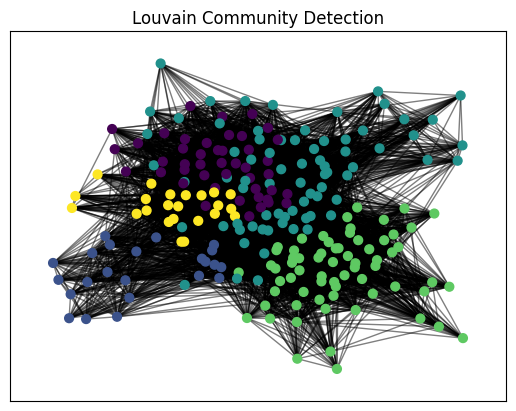

In [56]:
# Draw the graph
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Louvain Community Detection")
plt.show()

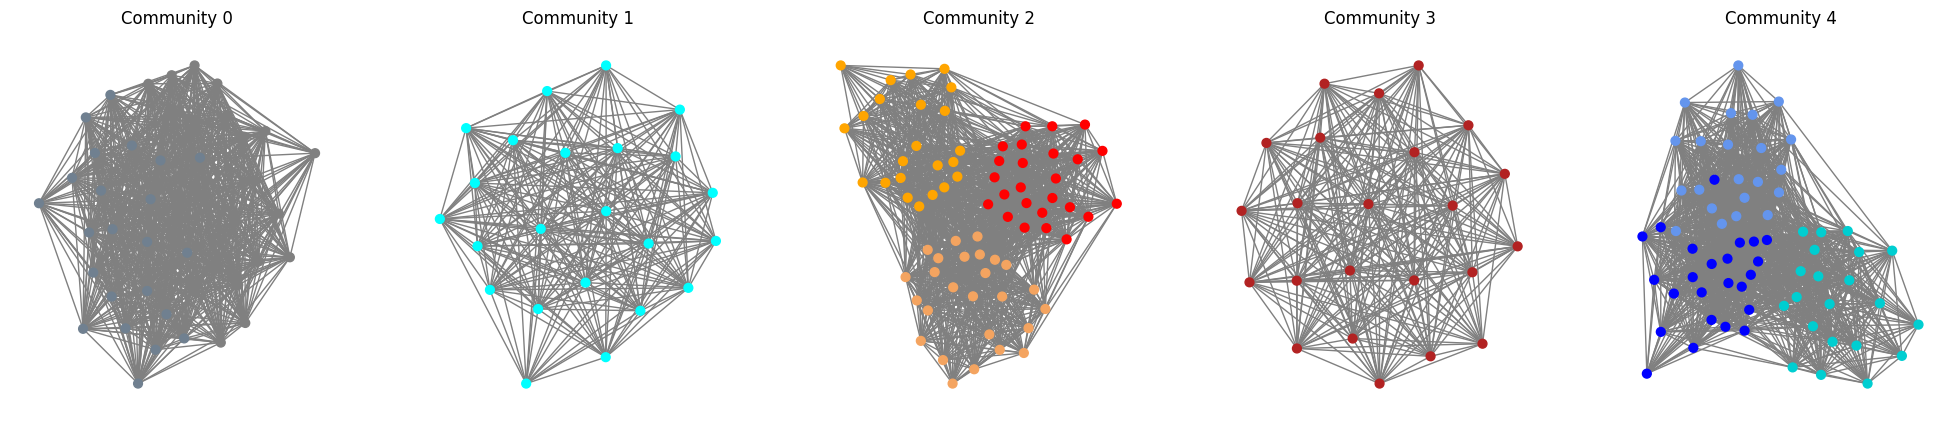

In [85]:
# Create a dictionary to hold subgraphs
subgraphs = {}
for community_id in set(partition.values()):
    subgraphs[community_id] = nx.Graph()

# Add nodes and edges to the corresponding subgraphs
for node, community_id in partition.items():
    subgraphs[community_id].add_node(node)
    for neighbor in G.neighbors(node):
        if partition[neighbor] == community_id:
            subgraphs[community_id].add_edge(node, neighbor)

# Plot each subgraph in a subplot
num_communities = len(subgraphs)
fig, axes = plt.subplots(1, num_communities, figsize=(5*num_communities, 5))
for ax, (community_id, subgraph) in zip(axes, subgraphs.items()):
    pos = nx.spring_layout(subgraph)
    node_colors = [grade_dict_more[node_grade[node]] for node in subgraph.nodes()]

    nx.draw(subgraph, pos, ax=ax, with_labels=False, node_size=40, node_color = node_colors, edge_color='gray')
    ax.set_title(f"Community {community_id}")

plt.show()

Note: I am using initial partitions as the grades

{1558: 0, 1567: 0, 1560: 0, 1570: 0, 1574: 0, 1632: 1, 1818: 1, 1866: 1, 1673: 2, 1698: 2, 1819: 1, 1836: 1, 1741: 0, 1820: 0, 1809: 0, 1822: 0, 1564: 0, 1768: 3, 1783: 3, 1802: 1, 1805: 1, 1831: 1, 1503: 4, 1545: 4, 1757: 3, 1760: 3, 1459: 4, 1516: 4, 1617: 2, 1641: 2, 1761: 3, 1452: 4, 1498: 4, 1520: 4, 1468: 4, 1502: 4, 1522: 4, 1539: 4, 1643: 2, 1648: 2, 1752: 3, 1778: 3, 1766: 3, 1770: 3, 1767: 3, 1787: 3, 1774: 3, 1477: 4, 1483: 4, 1457: 4, 1479: 4, 1606: 2, 1616: 2, 1613: 2, 1628: 2, 1723: 0, 1792: 3, 1451: 4, 1493: 4, 1495: 4, 1458: 4, 1461: 4, 1835: 1, 1453: 4, 1711: 3, 1759: 3, 1782: 0, 1801: 0, 1772: 3, 1775: 3, 1562: 0, 1748: 0, 1911: 2, 1603: 2, 1501: 4, 1857: 1, 1609: 2, 1439: 4, 1486: 4, 1594: 0, 1428: 4, 1471: 4, 1563: 4, 1592: 4, 1625: 2, 1847: 1, 1430: 4, 1482: 4, 1435: 4, 1489: 4, 1630: 1, 1821: 1, 1803: 1, 1427: 4, 1465: 4, 1431: 4, 1585: 4, 1578: 4, 1697: 2, 1765: 2, 1426: 4, 1429: 4, 1604: 2, 1913: 2, 1902: 2, 1919: 2, 1888: 1, 1916: 2, 1922: 2, 1917: 2, 1895: 1, 

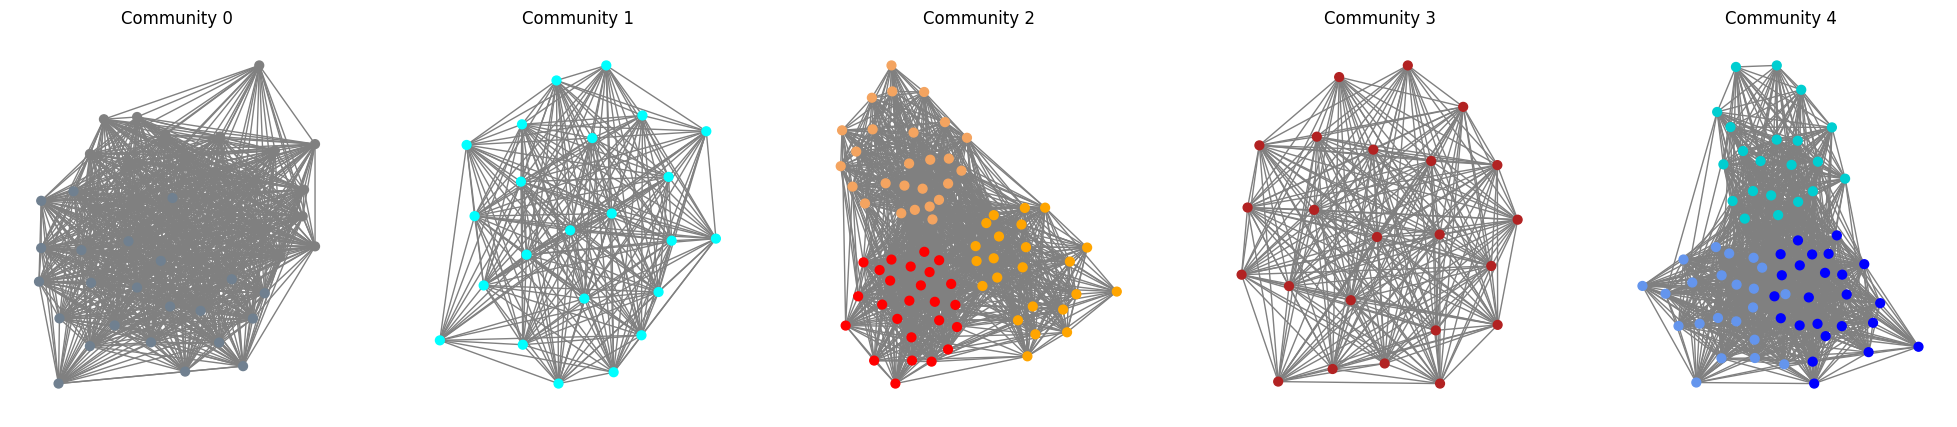

In [84]:

grades_partition = {}
grade_id = {'1A': 0, '1B': 1, '2A': 2, '2B': 3, '3A': 4, '3B': 5, '4A': 6, '4B': 7, '5A': 8, '5B': 9, 'Teachers': 10}

for node in G.nodes():
    grade = node_grade[node]
    if grade != "Teachers":
        grades_partition[node] = grade_id[grade]


# Detect communitie
partition = community_louvain.best_partition(G, resolution=1.0)#,  partition=grades_partition)

# Print the communities
print(partition)

# Create a dictionary to hold subgraphs
subgraphs = {}
for community_id in set(partition.values()):
    subgraphs[community_id] = nx.Graph()

# Add nodes and edges to the corresponding subgraphs
for node, community_id in partition.items():
    subgraphs[community_id].add_node(node)
    for neighbor in G.neighbors(node):
        if partition[neighbor] == community_id:
            subgraphs[community_id].add_edge(node, neighbor)

# Plot each subgraph in a subplot
num_communities = len(subgraphs)
fig, axes = plt.subplots(1, num_communities, figsize=(5*num_communities, 5))
for ax, (community_id, subgraph) in zip(axes, subgraphs.items()):
    pos = nx.spring_layout(subgraph)
    node_colors = [grade_dict_more[node_grade[node]] for node in subgraph.nodes()]

    nx.draw(subgraph, pos, ax=ax, with_labels=False, node_size=40, node_color = node_colors, edge_color='gray')
    ax.set_title(f"Community {community_id}")


## Label Propagation

In [37]:
from networkx.algorithms.community import label_propagation_communities

# Detect communities
communities = list(label_propagation_communities(G))

# Visualize
print(f"Number of communities detected: {len(communities)}")

Number of communities detected: 1


## Infomap

In [40]:
pip install igraph

   ---------------------------------------- 2.9/2.9 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
from igraph import Graph
from networkx import to_igraph

# Convert to iGraph
igraph_graph = nx.to_igraph(G)

# Run Infomap
clustering = igraph_graph.community_infomap()

# Number of communities
print(f"Number of communities detected: {len(clustering)}")

ImportError: cannot import name 'to_igraph' from 'networkx' (c:\Users\Dell 5520\Anaconda3\lib\site-packages\networkx\__init__.py)

## K-Clique Percolation


In [42]:
from networkx.algorithms.community import k_clique_communities

k = 10  # Choose a suitable k
communities = list(k_clique_communities(G, k))
print(f"Number of communities detected with k={k}: {len(communities)}")

Number of communities detected with k=10: 0


## Spectral CLustering

In [46]:
from sklearn.cluster import SpectralClustering
import numpy as np

adj_matrix = nx.to_numpy_array(G)  # Convert to adjacency matrix
n_clusters = 10  # Define the number of clusters

clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = clustering.fit_predict(adj_matrix)

# Group nodes into communities
from collections import defaultdict
communities = defaultdict(list)
for node, label in zip(G.nodes, labels):
    communities[label].append(node)

print(f"Number of communities detected: {len(communities)}")


c:\Users\Dell 5520\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\Users\Dell 5520\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_

Number of communities detected: 10


c:\Users\Dell 5520\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
c:\Users\Dell 5520\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
c:\Users\Dell 5520\Anaconda3\lib\site-packages\sklearn\m